In [185]:
import pickle as pck
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit
# import pylandau as pland
# import ROOT
import sys
from scipy.optimize import curve_fit

from ROOT import TFile, TTree
from array import array

from ROOT import TCanvas, TF1, TH1F, gStyle, TLegend, TLine


def gaussian(x, A, mu, sigma): 
    return A * np.exp(-((x - mu) ** 2) / (2 * sigma ** 2))


In [55]:
## Configuración del estilo de las imágenes
plt.rcParams.update({
    "image.origin": "lower",
    "image.aspect": 1,
    #"text.usetex": True,
    "grid.alpha": .5,
    "axes.linewidth":2,
    "lines.linewidth" : 1,
    "font.size":    15.0,
    "xaxis.labellocation": 'right',  # alignment of the xaxis label: {left, right, center}
    "yaxis.labellocation": 'top',  # alignment of the yaxis label: {bottom, top, center}
    "xtick.top":           True ,  # draw ticks on the top side
    "xtick.major.size":    8    ,# major tick size in points
    "xtick.minor.size":    4      ,# minor tick size in points
    "xtick.direction":     'in',
    "xtick.minor.visible": True,
    "ytick.right":           True ,  # draw ticks on the top side
    "ytick.major.size":    8    ,# major tick size in points
    "ytick.minor.size":    4      ,# minor tick size in points
    "ytick.direction":     'in',
    "ytick.minor.visible": True,
    "ytick.major.width":   2   , # major tick width in points
    "ytick.minor.width":   1 ,
    "xtick.major.width":   2   , # major tick width in points
    "xtick.minor.width":   1 ,
    "legend.framealpha": 0 ,
    "legend.loc": 'best',

})

In [309]:
# path_all = 'dict_energy_allclusters_NSAMP324_Extensions_1_to_4_Imgs_141_SIZE_250x529__NSIGMAS_15_KeV.pkl'
# path_all = 'dict_energy_allclusters_Fe55_NSAMP200_Extensions_1_to_4_Imgs_141_SIZE_250x539_NSIGMAS_40_KeV.pkl'

### Fuentes: Fe-55 y CS-137
# path_all = 'dict_energy_allclusters_Fe55_Cs137_NSAMP200_Extensions_1_to_4_Imgs_43_SIZE_50x539_NSIGMAS_80_KeV.pkl'
# path_all = 'dict_energy_allclusters_Fe55_Cs137_NSAMP200_Extensions_1_to_4_Imgs_43_SIZE_200x539_NSIGMAS_500_KeV.pkl'
# path_all = 'dict_energy_allclusters_Fe55_Cs137_NSAMP200_Extensions_1_to_4_Imgs_1_SIZE_200x539_NSIGMAS_300_KeV.pkl'

# path_all = 'dict_energy_allclusters_Fe55_NSAMP200_Extensions_1_to_4_Imgs_100_SIZE_150x539_NSIGMAS_40_KeV.pkl'
path_all = 'dict_energy_allclusters_Fe55_NSAMP200_Extensions_1_to_4_Imgs_100_SIZE_300x539_NSIGMAS_40_KeV.pkl'


path_all='../dict_energy_allclusters_NSAMP200_Extensions_1_to_4_Imgs_70_SIZE_250x529__NSIGMAS_5_KeV.pkl'
# path_all = '../dict_energy_allclusters_Fe55_NSAMP200_Extensions_1_to_4_Imgs_NEWCLUSTERIZATION_70_SIZE_250x539_NSIGMAS_SEED&SKIRTS_13_10_KeV.pkl'

histogram_all = open(path_all, 'rb')
data_histogram_all = pck.load(histogram_all)
histogram_all.close()

nsig = path_all.split('_')[10]
# print(nsig)

In [310]:
#### Visualizar las keys del diccionario ####
print('Las unidades de los datos están en: ', data_histogram_all['Energy_Units'])
print('Llaves principales del diccionario: ', data_histogram_all.keys())
print('Llaves secuandarias por extensión: ', data_histogram_all['extension_1'].keys())
# print(type(data_histogram['extension_1']['all_events']))

Las unidades de los datos están en:  2
Llaves principales del diccionario:  dict_keys(['Num_Images', 'All_clusters_detected', 'Energy_Units', 'extension_1', 'extension_2', 'extension_4'])
Llaves secuandarias por extensión:  dict_keys(['charge'])


In [311]:
data_all_extension_1 = data_histogram_all['extension_1']
data_all_extension_2 = data_histogram_all['extension_2']
data_all_extension_4 = data_histogram_all['extension_4'
                                        ]
print(data_all_extension_1.keys())

dict_keys(['charge'])


In [312]:
n_muons = data_histogram_all['All_clusters_detected']
print('Se detectaron ', n_muons, ' clusters (contando las 3 extensiones)')

Se detectaron  411135  clusters (contando las 3 extensiones)


## Espectro de Energía (solo Fe-55)

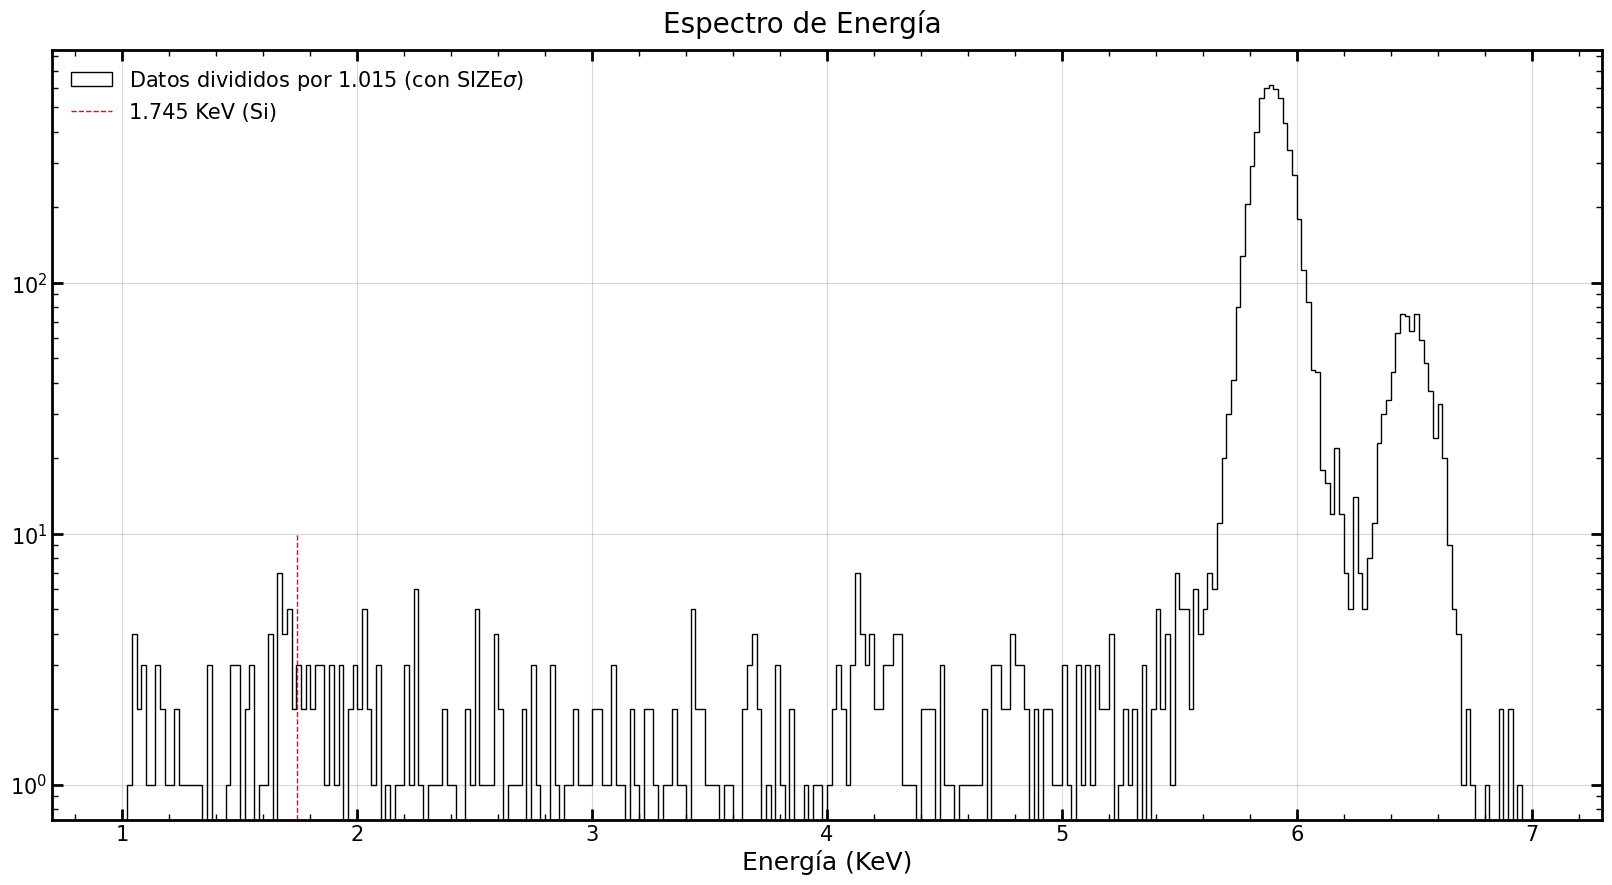

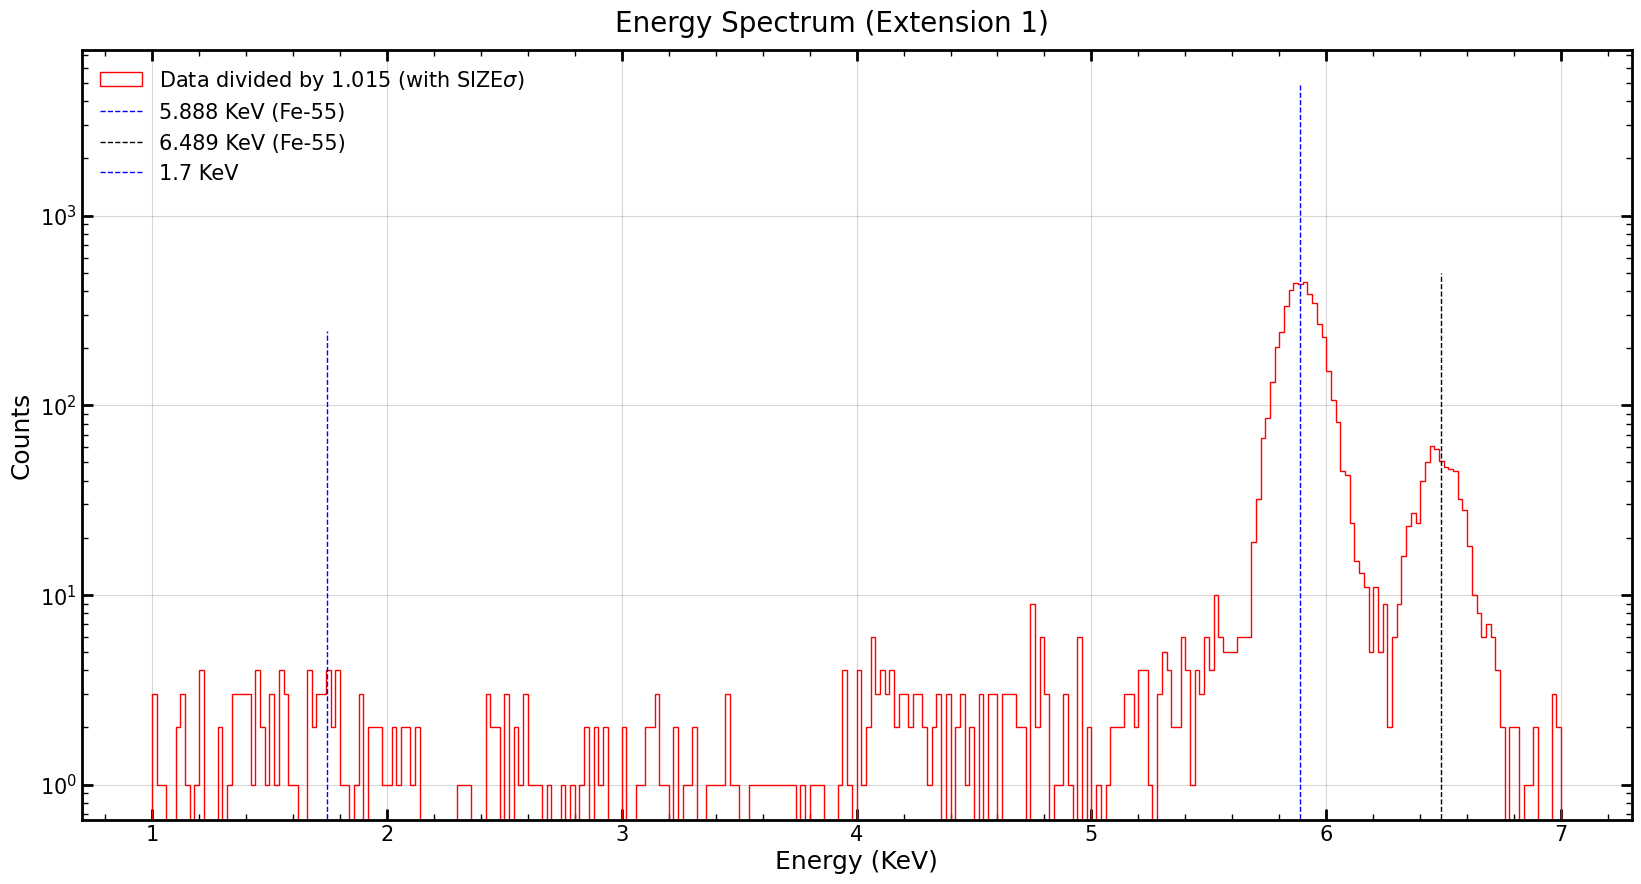

/tmp/ipykernel_6480/646368132.py:117: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  axs.legend()


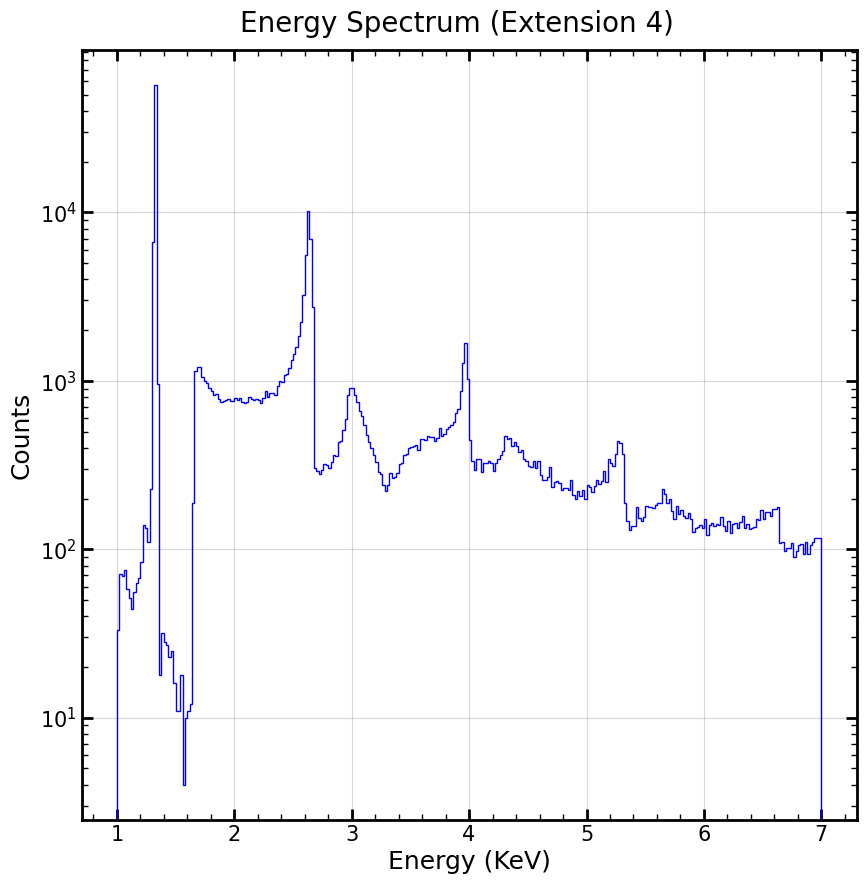

In [314]:
BINS = 300
plot_range = (1, 7)

# BINS = 50
# plot_range = (1, 4)

### ======== Re-scale data ======== ###
charge_ext1 = []
charge_ext2 = []
charge_ext4 = []
const = 1

rescale = 1.075
# rescale = 1.077
# rescale = 1
for charge in data_all_extension_1['charge']:
    ncharge = charge/rescale
    charge_ext1.append(ncharge)

rescale = 1.015
# rescale = 1.017
# rescale = 1
for charge in data_all_extension_2['charge']:
    ncharge = charge/rescale
    charge_ext2.append(ncharge)

for charge in data_all_extension_4['charge']:
    ncharge = charge/rescale
    charge_ext4.append(ncharge)
### ================================ ###


############################################ ----- EXTENSION 2 ----- ###################################

fig, axs = plt.subplots(figsize = [20,10])
# axs.hist(data_muons_all_extension['charge'], bins = 5000, color = 'k', label = 'Extensions 1-4')

axs.hist(charge_ext2 , bins = BINS, range= (plot_range[0], plot_range[1]), 
            color = 'k',  histtype = 'step', label='Datos divididos por ' + str(rescale)+ ' (con '+ str(nsig)+r'$\sigma$)' )


# axs.vlines(x=6.489*const, ymin=0, ymax=500, linestyles= 'dashed', colors='b', label='6.489 KeV (Fe-55)')
# axs.vlines(x=5.893*const, ymin=0, ymax=4200, linestyles= 'dashed', colors='b', label='5.893 KeV (Fe-55)')
# # axs.vlines(x=4.789*const, ymin=0, ymax=20, linestyles= 'dashed', colors='orange', label='4.789 KeV (Escape)')
# axs.vlines(x=4.134*const, ymin=0, ymax=35, linestyles= 'dashed', colors='orange', label='4.188 KeV (Escape)')
axs.vlines(x=1.745*const, ymin=0, ymax=10, linestyles= 'dashed', colors='r', label='1.745 KeV (Si)')
# axs.vlines(x=1.48*const, ymin=0, ymax=18, linestyles= 'dashed', colors='c', label='1.48 KeV (Al)')


val = 0.935
# axs.vlines(x=val*const, ymin=0, ymax=110, linestyles= 'dashed', colors='m', label=str(val) +' KeV')
axs.legend(loc = 'upper left')

## EScala Normal
# axs.set_ylim(0,200)
# axs.set_xlim(0,190000)

## Escala Log
axs.set_yscale('log')

# axs.set_xlabel('Energy (KeV)', size = 18, loc='center')
axs.set_xlabel('Energía (KeV)', size = 18, loc='center')
# axs.set_ylabel('Counts', size = 18, loc='center')
# fig.suptitle(r'Energy Spectrum (Extension 2)', size = 20, y=0.92)
fig.suptitle(r'Espectro de Energía', size = 20, y=0.92)
axs.grid()
plt.show()


############################################ ----- EXTENSION 1 ----- ###################################

fig, axs = plt.subplots(figsize = [20,10])
# axs.hist(data_muons_all_extension['charge'], bins = 5000, color = 'k', label = 'Extensions 1-4')

# axs.hist(data_muons_extension_2['all_events'], bins = 500, range= (np.min(data_muons_extension_2['all_events']),0.4 * 10**6), 
#             color = 'g', label= 'Extension 2')

axs.hist(charge_ext1, bins = BINS, range= (plot_range[0], plot_range[1]), 
            color = 'r',  histtype = 'step', label='Data divided by ' + str(rescale)+ ' (with '+ str(nsig)+r'$\sigma$)' )

hist, bins_edges = np.histogram(charge_ext1, bins=BINS, range = (plot_range[0], plot_range[1]))
maxval = np.argmax(hist)


axs.vlines(x=5.888*const, ymin=0, ymax= 4900, linestyles= 'dashed', colors='b', label='5.888 KeV (Fe-55)')
axs.vlines(x=6.489*const, ymin=0, ymax= 500, linestyles= 'dashed', colors='k', label='6.489 KeV (Fe-55)')

axs.vlines(x=1.745*const, ymin=0, ymax=maxval, linestyles= 'dashed', colors='b', label='1.7 KeV')
# axs.vlines(x=6.489*const, ymin=0, ymax=maxval/2, linestyles= 'dashed', colors='k', label='6.489 KeV')
# axs.vlines(x=val*const, ymin=0, ymax=110, linestyles= 'dashed', colors='m', label=str(val) +' KeV')

axs.legend(loc = 'upper left')

## EScala Normal
# axs.set_ylim(0,200)
# axs.set_xlim(0,190000)

## Escala Log
axs.set_yscale('log')


axs.set_xlabel('Energy (KeV)', size = 18, loc='center')
axs.set_ylabel('Counts', size = 18, loc='center')
fig.suptitle(r'Energy Spectrum (Extension 1)', size = 20, y=0.92)
axs.grid()
plt.show()




############################################ ----- EXTENSION 4 ----- ###################################
fig, axs = plt.subplots(figsize = [10,10])
# axs.hist(data_muons_all_extension['charge'], bins = 5000, color = 'k', label = 'Extensions 1-4')

axs.hist(charge_ext4, bins = BINS, range= (plot_range[0], plot_range[1]), 
            color = 'b', histtype = 'step')
axs.legend()

## EScala Normal
# axs.set_ylim(0,2000)

## Escala Log
axs.set_yscale('log')


axs.set_xlabel('Energy (KeV)', size = 18, loc='center')
axs.set_ylabel('Counts', size = 18, loc='center')
fig.suptitle(r'Energy Spectrum (Extension 4)', size = 20, y=0.92)
axs.grid()
plt.show()


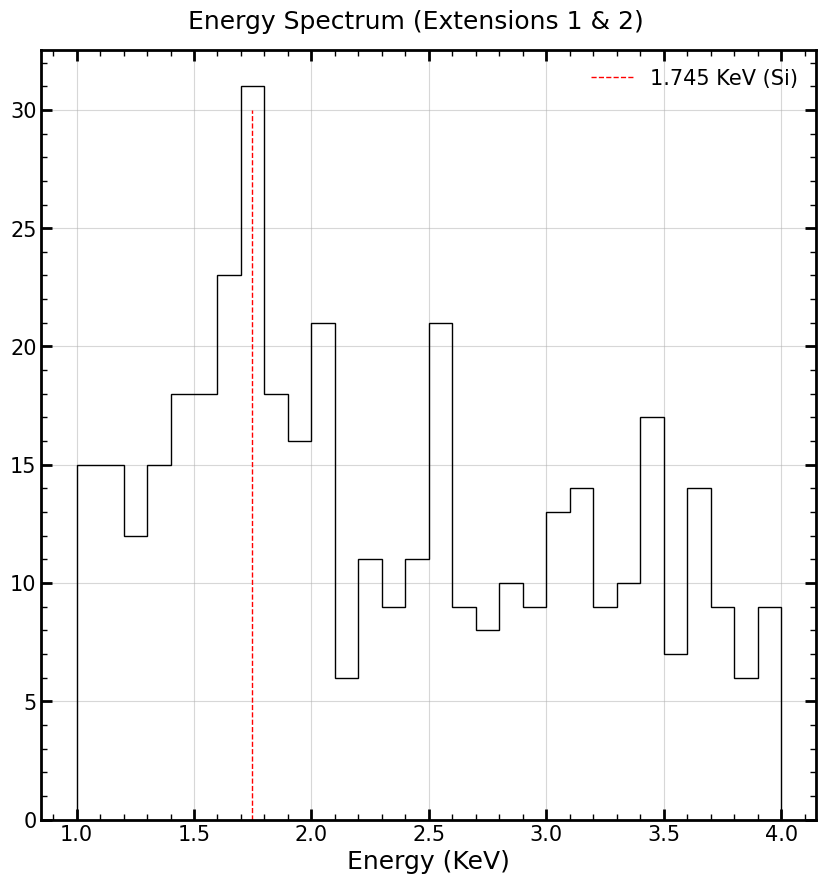

In [315]:
data_ext_1_2_all = charge_ext1 + charge_ext2

Bins = 30
# Range_plot = [4, 7]
Range_plot = [1, 4]
fig, axs = plt.subplots(figsize = [10,10])
axs.hist(data_ext_1_2_all, bins = Bins, range = [Range_plot[0], Range_plot[1]], color = 'k',  histtype = 'step')

const = 1
# axs.vlines(x=5.888*const, ymin=0, ymax=400, linestyles= 'dashed', label=str(5.888*const) + ' KeV', colors='b')
# axs.vlines(x=6.489*const, ymin=0, ymax=100, linestyles= 'dashed', label=str(6.489*const) + ' KeV', colors='r')
# axs.vlines(x=4.789*const, ymin=0, ymax=20, linestyles= 'dashed', colors='orange', label='4.789 KeV (Escape)')
# axs.vlines(x=4.188*const, ymin=0, ymax=35, linestyles= 'dashed', colors='orange', label='4.188 KeV (Escape)')
axs.vlines(x=1.745*const, ymin=0, ymax=30, linestyles= 'dashed', colors='r', label='1.745 KeV (Si)')
# axs.vlines(x=1.48*const, ymin=0, ymax=18, linestyles= 'dashed', colors='c', label='1.48 KeV (Al)')

axs.legend()
# axs.set_yscale('log')
# axs.set_ylim(50, 700)
axs.set_xlabel('Energy (KeV)', size = 18,loc='center')
axs.grid()
# axs.set_ylabel('Counts', size = 18)
fig.suptitle('Energy Spectrum (Extensions 1 & 2)', size = 18, y=0.92)
plt.show()

In [ ]:
hist, bins_edges = np.histogram(data_ext_1_2_all, bins=150, range = (5.8, 7))

print('El pico está en: ', bins_edges[np.argmax(hist)], ' KeV')

El pico está en:  5.92  KeV


In [326]:
# min_oScan = np.min(true_Oscan)
# extension = 4
Bins = 300
Bins_fit = Bins
# Range_fit = [-100, 400]

# Range_fit_1 = [6.2, 6.4]
Range_fit_1 = [5.75, 6.04]

# Range_fit_2 = [6.8, 7.2]
Range_fit_2 = [6.31, 6.7]
ratio_keV = 0.00367  ## KeV/e-

# data = hdu_list[extension-1].data[:, :550]
# data = data_ext_1_2_all
data = charge_ext2

# hist , bins_edges = np.histogram(true_Oscan.flatten(), bins = Bins,  range=(min_oScan, 18000))
# offset = bins_edges[np.argmax(hist)]
# Overscan_plane = true_Oscan - offset

fgaus_fir = TF1("gaus1","gaus", Range_fit_1[0], Range_fit_1[1],3) # TF1("nombre", "funcion escrita como en root", min, max, #parametros)
fgaus_sec = TF1("gaus2","gaus", Range_fit_2[0], Range_fit_2[1],3)

fgaus_Fepeak = TF1("gausFe","gaus", 4.05, 4.3,3)

Range_plot = [4, 7]
h3=TH1F("histogram", r"Espectro de Energía de ^{55}Fe",Bins_fit, Range_plot[0], Range_plot[1])
# h3.AddDirectory(False)
for pixel_value in data:
    # if not np.ma.is_masked(pixel_value):
    h3.Fill(pixel_value)
    #print(pixel_value)

fgaus_fir.SetParameters(200, 6, 60) # Establecer parametros iniciales del fit, de manera visual es posible determinarlos como una primera aproximacion
fgaus_sec.SetParameters(100, 200, 60)

h3.Fit(fgaus_fir, "RNQ")
h3.Fit(fgaus_sec, "RNQ")
h3.Fit(fgaus_Fepeak, "RN")

c1=TCanvas("", "", 1000, 600)
c1.SetLogy()
c1.SetGrid()
h3.SetStats(0)
h3.GetXaxis().SetTitle("Energ#acute{i}a (KeV)")
h3.Draw()
h3.SetColors(1)

# fgaus_fir.GetXaxis().SetRangeUser(-100,10000)
fgaus_fir.Draw("same")
fgaus_sec.Draw("same")
# fgaus_Fepeak.Draw("same")
c1.Draw()

en_scape = 4.125
line1 = TLine(en_scape, 0, en_scape, 5)
line1.SetLineColor(4)
line1.Draw()

leg = TLegend(0.1,0.7,0.48,0.9)
# leg.AddEntry(h3, "Datos", "L")
leg.AddEntry(h3, r"cal = 196.881 \pm 7.802 ADU/e")
leg.AddEntry(fgaus_fir, r"K\alpha: " + str(np.around(fgaus_fir.GetParameters()[1], 5)) + r"\pm " + str(np.around(fgaus_fir.GetParError(1), 5))+ " KeV", "L")
leg.AddEntry(fgaus_sec, r"K\beta: " + str(np.around(fgaus_sec.GetParameters()[1], 5)) + r"\pm " + str(np.around(fgaus_sec.GetParError(1), 5))+ " KeV", "L")
leg.AddEntry(line1, r"^{55}Fe-Si pico", "L")
leg.Draw()

gStyle.SetOptFit(1100)

print('Parameters of the First Gaussian Fit')
print('Mean: ', fgaus_fir.GetParameters()[1],  ' +- ', fgaus_fir.GetParError(1))
print('Sigma: ', fgaus_fir.GetParameters()[2],  ' +- ', fgaus_fir.GetParError(2))
print("chiSquare: " + str(fgaus_fir.GetChisquare()))
print("NDegrees of Freedom: " + str(fgaus_fir.GetNDF()))
# # print("chiSquare / NDF :", fgaus2.GetChisquare() / fgaus2.GetNDF())
print("Prob:", fgaus_fir.GetProb(), '\n')

print('Parameters of the Second Gaussian Fit')
print('Mean: ', fgaus_sec.GetParameters()[1],  ' +- ', fgaus_sec.GetParError(1))
print('Sigma: ', fgaus_sec.GetParameters()[2],  ' +- ', fgaus_sec.GetParError(2))
print("chiSquare: " + str(fgaus_sec.GetChisquare()))
print("NDegrees of Freedom: " + str(fgaus_sec.GetNDF()))
# # print("chiSquare / NDF :", fgaus2.GetChisquare() / fgaus2.GetNDF())
print("Prob:", fgaus_sec.GetProb(), '\n')

true_gain = fgaus_sec.GetParameters()[1] - fgaus_fir.GetParameters()[1]
err_true_gain = fgaus_sec.GetParError(1) + fgaus_fir.GetParError(1)
print('True Gain: ', true_gain, ' +- ', err_true_gain, ' ADU/e- \n')


Parameters of the First Gaussian Fit
Mean:  5.89494262662316  +-  0.0011083221716716046
Sigma:  0.0712599287580128  +-  0.001085907117290591
chiSquare: 28.199412146193836
NDegrees of Freedom: 26
Prob: 0.3487160322890087 

Parameters of the Second Gaussian Fit
Mean:  6.481983335027972  +-  0.0033175807075265665
Sigma:  0.08238216529018987  +-  0.0029408686576212623
chiSquare: 21.33873845681454
NDegrees of Freedom: 36
Prob: 0.9749719248330972 

True Gain:  0.5870407084048122  +-  0.0044259028791981715  ADU/e- 

****************************************
Minimizer is Minuit2 / Migrad
Chi2                      =      7.25384
NDf                       =           18
Edm                       =  7.67978e-06
NCalls                    =          631
Constant                  =      6.55325   +/-   33.396      
Mean                      =      2.99528   +/-   2.98109     
Sigma                     =     0.707902   +/-   0.556041     	 (limited)


Warning in <TROOT::Append>: Replacing existing TH1: histogram (Potential memory leak).


In [ ]:
# min_oScan = np.min(true_Oscan)
# extension = 4
Bins = 35
Bins_fit = Bins

data = charge_ext2
# data = data_ext_1_2_all

Range_plot = [1, 4]
h3=TH1F("histogram", r"Espectro de Energía de ^{55}Fe",Bins_fit, Range_plot[0], Range_plot[1])
# h3.AddDirectory(False)
for pixel_value in data:
    # if not np.ma.is_masked(pixel_value):
    h3.Fill(pixel_value)
    #print(pixel_value)


c1=TCanvas("", "", 1000, 600)
# c1.SetLogy()
c1.SetGrid()
h3.SetStats(0)
h3.GetXaxis().SetTitle("Energ#acute{i}a (KeV)")
h3.SetColors(1)
h3.SetAxisRange(0,16, "Y")
h3.Draw()


c1.Draw()

es_si = 1.745
lineSi = TLine(es_si, 0, es_si, 14)
lineSi.SetLineColor(4)
lineSi.Draw()

leg = TLegend(0.1,0.7,0.48,0.9)
# leg.AddEntry(h3, "Datos", "L")
# leg.AddEntry(h3, r"cal = 196.881 \pm 7.802 ADU/e")
leg.AddEntry(lineSi, r"E_{Si} = " + str(es_si)+ " KeV", "L")
leg.Draw()


Warning in <TROOT::Append>: Replacing existing TH1: histogram (Potential memory leak).


## Espectro de Energía (Fe-55 y Cs-137)

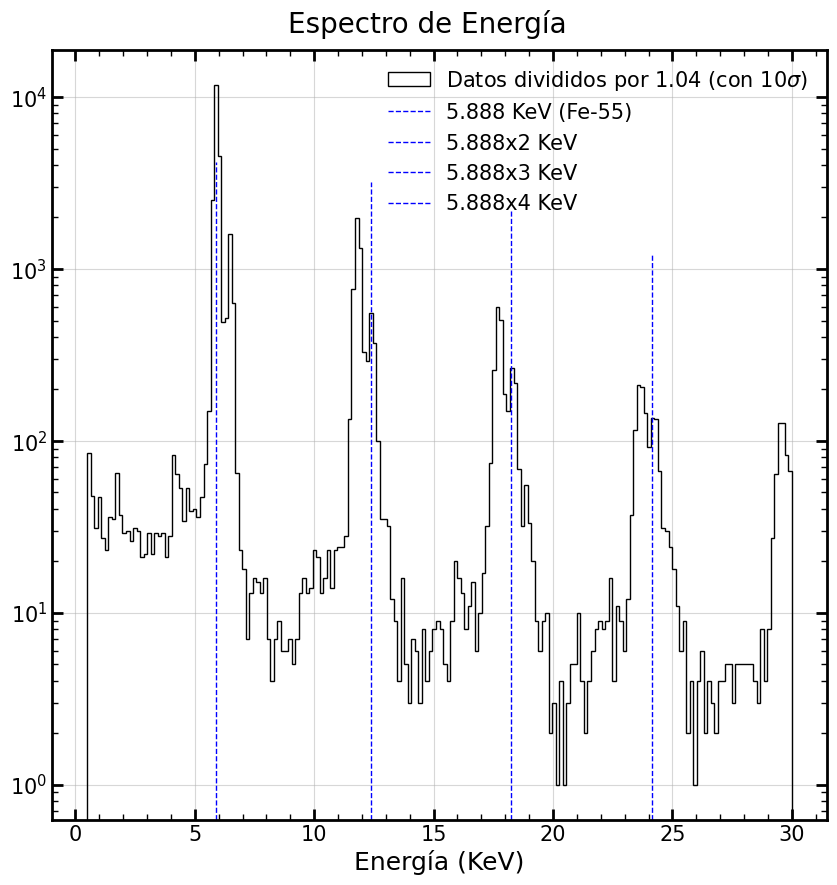

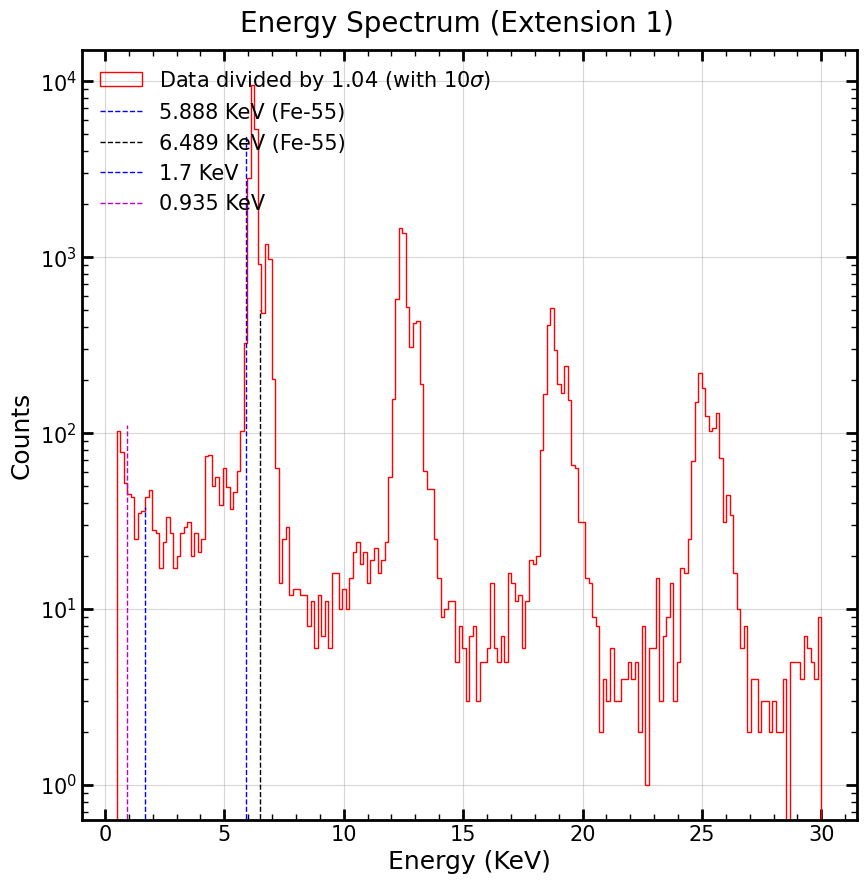

/tmp/ipykernel_9109/1657000743.py:117: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  axs.legend()


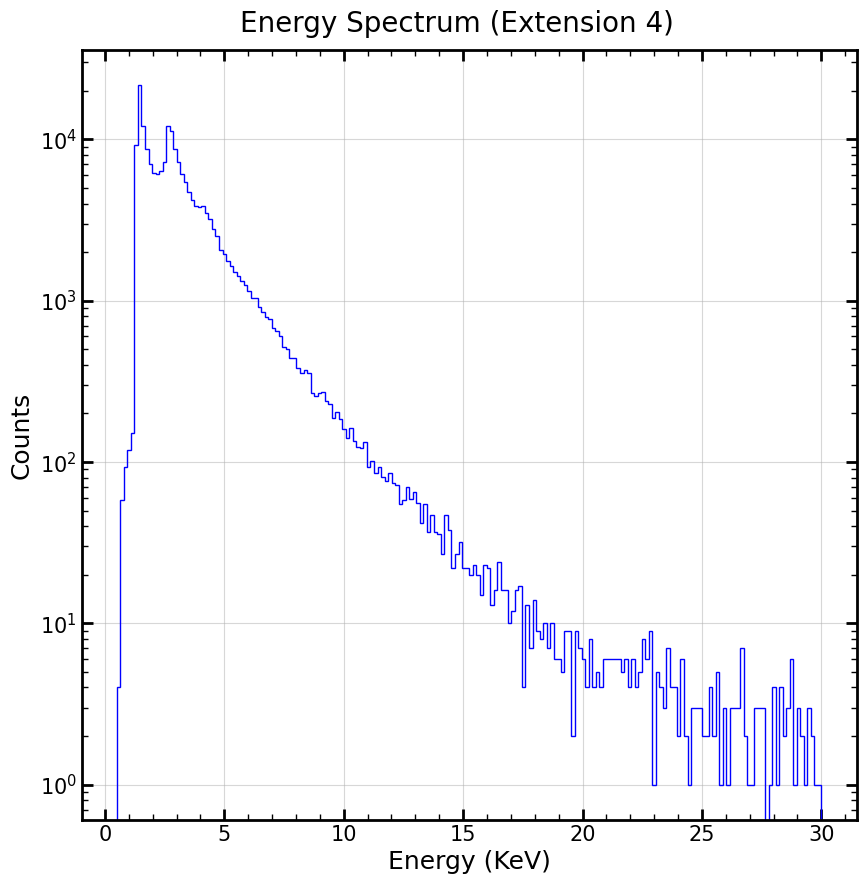

In [41]:
BINS = 200
plot_range = (0.5, 30)
# plot_range = (500, 700)

### ======== Re-scale data ======== ###
charge_ext1 = []
charge_ext2 = []
charge_ext4 = []
rescale = 1.04
const = 1

for charge in data_all_extension_1['charge']:
    ncharge = charge/rescale
    charge_ext1.append(ncharge)

for charge in data_all_extension_2['charge']:
    ncharge = charge/rescale
    charge_ext2.append(ncharge)

for charge in data_all_extension_4['charge']:
    ncharge = charge/rescale
    charge_ext4.append(ncharge)
### ================================ ###


############################################ ----- EXTENSION 2 ----- ###################################

fig, axs = plt.subplots(figsize = [10,10])
# axs.hist(data_muons_all_extension['charge'], bins = 5000, color = 'k', label = 'Extensions 1-4')

axs.hist(charge_ext2 , bins = BINS, range= (plot_range[0], plot_range[1]), 
            color = 'k',  histtype = 'step', label='Datos divididos por ' + str(rescale)+ ' (con '+ str(nsig)+r'$\sigma$)' )

# axs.vlines(x=6.489*const, ymin=0, ymax=500, linestyles= 'dashed', colors='b', label='6.489 KeV (Fe-55)')
# axs.vlines(x=5.888*const, ymin=0, ymax=4200, linestyles= 'dashed', colors='b', label='5.888 KeV (Fe-55)')
# axs.vlines(x=4.789*const, ymin=0, ymax=20, linestyles= 'dashed', colors='orange', label='4.789 KeV (Escape)')
# axs.vlines(x=4.188*const, ymin=0, ymax=35, linestyles= 'dashed', colors='orange', label='4.188 KeV (Escape)')
# axs.vlines(x=1.74*const, ymin=0, ymax=30, linestyles= 'dashed', colors='r', label='1.7 KeV (Si)')
# axs.vlines(x=1.48*const, ymin=0, ymax=18, linestyles= 'dashed', colors='c', label='1.48 KeV (Al)')

val = 0.935
# axs.vlines(x=val*const, ymin=0, ymax=110, linestyles= 'dashed', colors='m', label=str(val) +' KeV')

axs.vlines(x=5.888*const, ymin=0, ymax=4200, linestyles= 'dashed', colors='b', label='5.888 KeV (Fe-55)')
axs.vlines(x=5.888*2.1, ymin=0, ymax=3200, linestyles= 'dashed', colors='b', label='5.888x2 KeV')
axs.vlines(x=5.888*3.1, ymin=0, ymax=2200, linestyles= 'dashed', colors='b', label='5.888x3 KeV')
axs.vlines(x=5.888*4.1, ymin=0, ymax=1200, linestyles= 'dashed', colors='b', label='5.888x4 KeV')


# axs.legend(loc = 'upper left')
axs.legend(loc = 'upper right')

## EScala Normal
# axs.set_ylim(0,200)
# axs.set_xlim(0,190000)

## Escala Log
axs.set_yscale('log')


# axs.set_xlabel('Energy (KeV)', size = 18, loc='center')
axs.set_xlabel('Energía (KeV)', size = 18, loc='center')
# axs.set_ylabel('Counts', size = 18, loc='center')
# fig.suptitle(r'Energy Spectrum (Extension 2)', size = 20, y=0.92)
fig.suptitle(r'Espectro de Energía', size = 20, y=0.92)
axs.grid()
plt.show()


############################################ ----- EXTENSION 1 ----- ###################################

fig, axs = plt.subplots(figsize = [10,10])
# axs.hist(data_muons_all_extension['charge'], bins = 5000, color = 'k', label = 'Extensions 1-4')

# axs.hist(data_muons_extension_2['all_events'], bins = 500, range= (np.min(data_muons_extension_2['all_events']),0.4 * 10**6), 
#             color = 'g', label= 'Extension 2')

axs.hist(charge_ext1, bins = BINS, range= (plot_range[0], plot_range[1]), 
            color = 'r',  histtype = 'step', label='Data divided by ' + str(rescale)+ ' (with '+ str(nsig)+r'$\sigma$)' )

hist, bins_edges = np.histogram(charge_ext1, bins=BINS, range = (plot_range[0], plot_range[1]))
maxval = np.argmax(hist)


axs.vlines(x=5.888*const, ymin=0, ymax= 4900, linestyles= 'dashed', colors='b', label='5.888 KeV (Fe-55)')
axs.vlines(x=6.489*const, ymin=0, ymax= 500, linestyles= 'dashed', colors='k', label='6.489 KeV (Fe-55)')

axs.vlines(x=1.7*const, ymin=0, ymax=maxval, linestyles= 'dashed', colors='b', label='1.7 KeV')
# axs.vlines(x=6.489*const, ymin=0, ymax=maxval/2, linestyles= 'dashed', colors='k', label='6.489 KeV')
axs.vlines(x=val*const, ymin=0, ymax=110, linestyles= 'dashed', colors='m', label=str(val) +' KeV')

axs.legend(loc = 'upper left')

## EScala Normal
# axs.set_ylim(0,200)
# axs.set_xlim(0,190000)

## Escala Log
axs.set_yscale('log')


axs.set_xlabel('Energy (KeV)', size = 18, loc='center')
axs.set_ylabel('Counts', size = 18, loc='center')
fig.suptitle(r'Energy Spectrum (Extension 1)', size = 20, y=0.92)
axs.grid()
plt.show()




############################################ ----- EXTENSION 4 ----- ###################################
fig, axs = plt.subplots(figsize = [10,10])
# axs.hist(data_muons_all_extension['charge'], bins = 5000, color = 'k', label = 'Extensions 1-4')

axs.hist(charge_ext4, bins = BINS, range= (plot_range[0], plot_range[1]), 
            color = 'b', histtype = 'step')
axs.legend()

## EScala Normal
# axs.set_ylim(0,2000)

## Escala Log
axs.set_yscale('log')


axs.set_xlabel('Energy (KeV)', size = 18, loc='center')
axs.set_ylabel('Counts', size = 18, loc='center')
fig.suptitle(r'Energy Spectrum (Extension 4)', size = 20, y=0.92)
axs.grid()
plt.show()
